# Bike Sharing Assignment

## Import required liberaries

In [2548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

## Loading data 

In [2550]:
data = pd.read_csv('./day.csv')

In [2551]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Check data summary

In [2553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2554]:
round(100*(data.isna().sum()/len(data)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [2555]:
## data is having 730 rows
## data is not having any null or missing values.

In [2556]:
# droping index row before checking for dublicate. Also it will bnot contribute in our analysis

In [2557]:

data = data.drop(columns=['instant'],axis=1)

In [2558]:
data[data.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [2559]:
# no dublicate rows

In [2560]:
# Removing Redundent columms
# 1) dteday: this data can be from yr : year (0: 2018, 1:2019) and mnth : month ( 1 to 12)  coloumn
# 2) casual: our target variable is cnt which which is sum of casual and registered. since we are intrested in total demand we can drop classifications.
# 3) registered; our target variable is cnt which which is sum of casual and registered. since we are intrested in total demand we can drop classifications.

In [2561]:

data = data.drop(columns=['dteday','casual','registered'],axis=1)

In [2562]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2563]:
#cnt is our target variable
numerical_col=['temp','atemp','hum','windspeed','cnt']
categorical_col=['season','yr','mnth','holiday','weekday','weathersit']

In [2564]:
data[numerical_col].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [2565]:
# we can see that temp and atemp are highly corelated so we can drop any one of them

In [2566]:
data = data.drop(columns=['atemp'],axis=1)

In [2567]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Data preparation for linear regression

In [2569]:
#Creating dummy variables

In [2570]:
# convert category coloumn to category type fron numeric to get proper dummy variable values
data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')

In [2571]:
dummy_var = pd.get_dummies(data[['season','weathersit','mnth','weekday']],dtype=int, drop_first=True)
dummy_var.head()

,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2572]:
dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   season_2      730 non-null    int32
 1   season_3      730 non-null    int32
 2   season_4      730 non-null    int32
 3   weathersit_2  730 non-null    int32
 4   weathersit_3  730 non-null    int32
 5   mnth_2        730 non-null    int32
 6   mnth_3        730 non-null    int32
 7   mnth_4        730 non-null    int32
 8   mnth_5        730 non-null    int32
 9   mnth_6        730 non-null    int32
 10  mnth_7        730 non-null    int32
 11  mnth_8        730 non-null    int32
 12  mnth_9        730 non-null    int32
 13  mnth_10       730 non-null    int32
 14  mnth_11       730 non-null    int32
 15  mnth_12       730 non-null    int32
 16  weekday_1     730 non-null    int32
 17  weekday_2     730 non-null    int32
 18  weekday_3     730 non-null    int32
 19  weekday_4     730 non-null   

In [2573]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [2574]:
data = pd.concat([data, dummy_var], axis = 1)

In [2575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        730 non-null    category
 1   yr            730 non-null    int64   
 2   mnth          730 non-null    category
 3   holiday       730 non-null    int64   
 4   weekday       730 non-null    category
 5   workingday    730 non-null    int64   
 6   weathersit    730 non-null    category
 7   temp          730 non-null    float64 
 8   hum           730 non-null    float64 
 9   windspeed     730 non-null    float64 
 10  cnt           730 non-null    int64   
 11  season_2      730 non-null    int32   
 12  season_3      730 non-null    int32   
 13  season_4      730 non-null    int32   
 14  weathersit_2  730 non-null    int32   
 15  weathersit_3  730 non-null    int32   
 16  mnth_2        730 non-null    int32   
 17  mnth_3        730 non-null    int32   
 18  mnth_4    

In [2576]:
data = data.drop(columns=['season','weathersit','mnth','weekday'],axis=1)

In [2577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    int32  
 8   season_3      730 non-null    int32  
 9   season_4      730 non-null    int32  
 10  weathersit_2  730 non-null    int32  
 11  weathersit_3  730 non-null    int32  
 12  mnth_2        730 non-null    int32  
 13  mnth_3        730 non-null    int32  
 14  mnth_4        730 non-null    int32  
 15  mnth_5        730 non-null    int32  
 16  mnth_6        730 non-null    int32  
 17  mnth_7        730 non-null    int32  
 18  mnth_8        730 non-null    

## SPLITTING THE DATA INTO TRANING DATA & TEST DATA (70:30)

In [2579]:
data_train,data_test= train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2580]:
# dimentions for train and test
print(data_test.shape)
print(data_train.shape)


(219, 29)
(510, 29)


In [2581]:
#scaling numerical colomn
scaler = MinMaxScaler()
numeric_var = ['temp','hum','windspeed','cnt']
data_train[numeric_var] = scaler.fit_transform(data_train[numeric_var])

# Analysing the train dataframe after scaling
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2582]:
Y_train = data_train.pop('cnt')
X_train = data_train

print (Y_train.head())
print (X_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
     yr  holiday  workingday      temp       hum  windspeed  season_2  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         1   

     season_3  season_4  weathersit_2  ...  mnth_9  mnth_10  mnth_11  mnth_12  \
653         0         1             0  ...       0        1        0        0   
576         1         0             0  ...       0        0        0        0   
426         0         0             1  ...       0        0        0        0   
728         0         0             0  ...       0        0        0        1   
482         0         0             1  ...       0

# Build Linear Regression Model

In [2584]:
# Using RFE to select top 15 significant features

In [2585]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm,n_features_to_select= 15)            
rfe = rfe.fit(X_train, Y_train)

In [2586]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1)]

In [2587]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6'],
      dtype='object')

In [2588]:
X_train_rfe = X_train[col]

In [2589]:
rfe.predict(X_train)

array([0.76165811, 0.73749543, 0.4881678 , 0.34486339, 0.61668272,
       0.27797813, 0.82215843, 0.79597239, 0.7436904 , 0.63338874,
       0.54596623, 0.87450331, 0.46507694, 0.75251026, 0.52893734,
       0.78515852, 0.66295197, 0.56610592, 0.55713688, 0.53131895,
       0.58268985, 0.61789001, 0.81133722, 0.60882629, 0.29868159,
       0.8192254 , 0.3762422 , 0.76716594, 0.71781707, 0.55713147,
       0.4078482 , 0.48670443, 0.60363674, 0.42582982, 0.51380468,
       0.60759516, 0.33677337, 0.52786677, 0.79465026, 0.76238023,
       0.59731554, 0.4217497 , 0.44264075, 0.1634481 , 0.73681165,
       0.56312634, 0.67283643, 0.77877542, 0.60123041, 0.79326577,
       0.53470601, 0.78671161, 0.57394439, 0.47759529, 0.60847451,
       0.61370878, 0.77061359, 0.55094994, 0.87403786, 0.69846109,
       0.37024017, 0.41622534, 0.63230371, 0.1948882 , 0.53613093,
       0.77705463, 0.67863094, 0.48529696, 0.50637745, 0.7101615 ,
       0.74353419, 0.38181874, 0.78396901, 0.10530781, 0.56625

In [2590]:
#Function to create model using statsmodel api
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(Y_train, X_train_sm)
    lm=lr.fit()   
    print(lm.summary())
    return {"model":lm,"train_data":X_train_sm}

In [2591]:
#Function to calculate VIFs coloum 
def calculate_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

# Model 1

In [2593]:
create_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.89e-191
Time:                        22:00:46   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x249e211eb50>,
 'train_data':      const  yr  holiday  workingday      temp       hum  windspeed  season_2  \
 653    1.0   1        0           1  0.509887  0.575354   0.300794         0   
 576    1.0   1        0           1  0.815169  0.725633   0.264686         0   
 426    1.0   1        0           0  0.442393  0.640189   0.255342         0   
 728    1.0   1        0           0  0.245101  0.498067   0.663106         0   
 482    1.0   1        0           0  0.395666  0.504508   0.188475         1   
 ..     ...  ..      ...         ...       ...       ...        ...       ...   
 526    1.0   1        0           1  0.824514  0.605840   0.355596         1   
 578    1.0   1        0           1  0.863973  0.679690   0.187140         0   
 53     1.0   0        0           1  0.202618  0.435939   0.111379         0   
 350    1.0   0        0           0  0.248216  0.577930   0.431816         0   
 79 

In [2594]:
col=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6']

In [2595]:
create_model(col)
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.24e-192
Time:                        22:00:46   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [2596]:
col=['yr', 'holiday', 'workingday', 'temp',  'windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6']


In [2597]:
create_model(col)
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          6.16e-189
Time:                        22:00:46   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

In [2598]:
col=['yr', 'workingday', 'temp',  'windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
'mnth_9', 'mnth_10', 'weekday_6']


In [2599]:
lrf=create_model(col)
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.86e-189
Time:                        22:00:46   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

# Residual Analysis

In [2601]:
# Residual Analysis of Trained Data
#using the final model lrf on train data to predict Y_train_pred values
Y_train_pred=lrf["model"].predict(lrf["train_data"])


Text(0.5, 0, 'Errors')

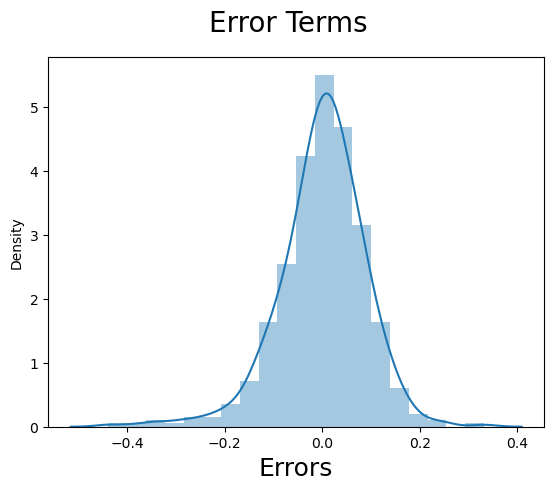

In [2602]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### From the above histogram, we could see that the Residuals are normally distributed.

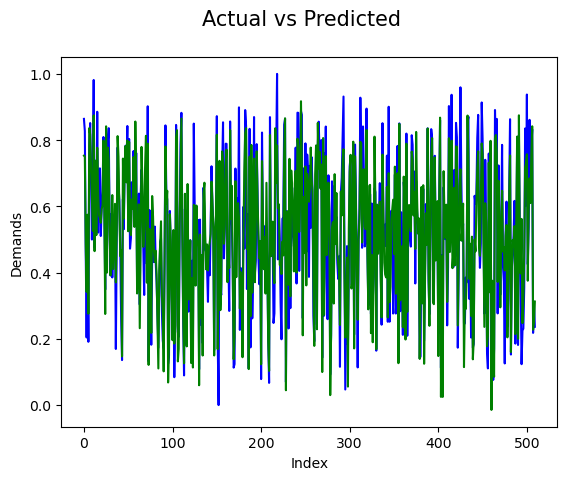

In [2604]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,Y_train, color="blue")
plt.plot(c,Y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

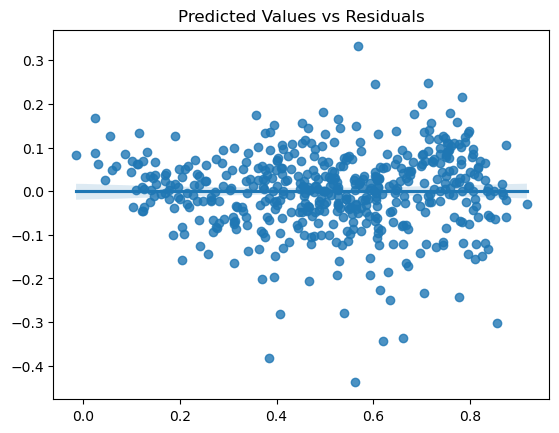

In [2605]:

sns.regplot(x=Y_train_pred,y=Y_train-Y_train_pred)
plt.title("Predicted Values vs Residuals")
plt.show()

## Residual errors are independent of each other

## Model Predictions

In [2608]:
X_test=data_test[col]

# R squared Value

In [2610]:
# R square on traning dat set 
r2_score(Y_train, Y_train_pred)

0.8404661410295055

In [2611]:
#scaling numerical colomn

numeric_var = ['temp','hum','windspeed','cnt']
data_test[numeric_var] = scaler.fit_transform(data_test[numeric_var])

# Analysing the train dataframe after scaling
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2612]:
Y_test = data_test.pop('cnt')
X_test = data_test[col]
print (Y_test.head())
print (X_test.head())

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64
     yr  workingday      temp  windspeed  season_2  season_4  weathersit_2  \
184   0           0  0.837241   0.149393         0         0             1   
535   1           1  0.911423   0.231142         1         0             0   
299   0           1  0.496221   0.443398         0         1             1   
221   0           1  0.890387   0.449707         0         0             0   
152   0           1  0.821739   0.682387         1         0             0   

     weathersit_3  mnth_8  mnth_9  mnth_10  weekday_6  
184             0       0       0        0          0  
535             0       0       0        0          0  
299             0       0       0        1          0  
221             0       1       0        0          0  
152             0       0       0        0          0  


In [2613]:

X_test_sm = sm.add_constant(X_test)


In [2614]:
X_test_sm

,const,yr,workingday,temp,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
184,1.0,0,0,0.837241,0.149393,0,0,1,0,0,0,0,0
535,1.0,1,1,0.911423,0.231142,1,0,0,0,0,0,0,0
299,1.0,0,1,0.496221,0.443398,0,1,1,0,0,0,1,0
221,1.0,0,1,0.890387,0.449707,0,0,0,0,1,0,0,0
152,1.0,0,1,0.821739,0.682387,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.224955,0.388364,0,0,1,0,0,0,0,0
702,1.0,1,1,0.503971,0.383644,0,1,0,0,0,0,0,0
127,1.0,0,0,0.573725,0.132095,1,0,0,0,0,0,0,0
640,1.0,1,1,0.745342,0.111637,0,1,1,0,0,0,1,0


In [2615]:
Y_test_pred=lrf["model"].predict(X_test_sm)

In [2616]:
Y_test_pred

184    0.405923
535    0.906322
299    0.406052
221    0.581845
152    0.557778
         ...   
400    0.288925
702    0.698855
127    0.460254
640    0.817731
72     0.251888
Length: 219, dtype: float64

In [2617]:
# R square for test data
r2_score(Y_test, Y_test_pred)

0.7932908737433815

In [2618]:
lrf["model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.86e-189
Time:                        22:00:46   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610      0.000       0.049       0.122
yr               0.2331      0.008     28.734      0.000       0.217       0.249
workingday       0.0555      0.011      5.031      0.000       0.034       0.077
temp             0.5116      0.022     23.259      0.000       0.468       0.555
windspeed       -0.1542      0.025     -6.226      0.000      -0.203      -0.106
season_2         0.1015      0.011      9.269      0.000       0.080       0.123
season_4         0.1260      0.012     10.461      0.000       0.102       0.150
weathersit_2    -0.0849      0.009     -9.764      0.000      -0.102      -0.068
weathersit_3    -0.2932      0.025    -11.936      0.000      -0.342      -0.245
mnth_8           0.0546      0.016      3.318      0.001       0.022       0.087
mnth_9           0.1172      0.016      7.146      0.000       0.085       0.149
mnth_10          0.0384      0.017      2.198      0.028       0.004       0.073
weekday_6        0.0662      0.014      4.656      0.000       0.038       0.094
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2619]:
lrf["model"].params.sort_values(ascending=False)

temp            0.511556
yr              0.233075
season_4        0.126028
mnth_9          0.117202
season_2        0.101541
const           0.085592
weekday_6       0.066176
workingday      0.055517
mnth_8          0.054608
mnth_10         0.038377
weathersit_2   -0.084925
windspeed      -0.154220
weathersit_3   -0.293233
dtype: float64

# Conclusion
## Top 5 Significant variables to predict the demand for shared bikes

1)temperature <br>
2) weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)<br>
3) Year <br>
4) Wind Speed <br>
5) season_4: Winter<br>